# Introduction to IoT - Final Work
## Smart Cooking Assistant
## Author: Martyna Pitera

Final work plan is to specify and analyze of fictitious system that suggests recipes based on the ingredients available in the refrigerator and on the weather: Smart Cooking Assistant.

The Smart Cooking Assistant would be connected to other systems and would be able to recognize the ingredients placed in the refrigerator.

I’ve chosen this topic because I'm not the best cook myself. I've often found it tricky to come up with meal ideas and make cooking enjoyable. That’s the reason for creating a system that makes cooking easier and more exciting for people like me who struggle with it. I want to use technology to help people have a better time in the kitchen, including myself.

## Smart Cooking Assistand in IoT

The Smart Cooking Assistant leverages IoT technology by incorporating connected devices, such as cameras or sensors, to scan and identify ingredients in the user's refrigerator. This IoT integration enables the system to gather real-time data about available ingredients, enhancing its ability to provide personalized recipe recommendations. Additionaly, by integrating weather information, the system gains a contextual understanding of external conditions. This enables it to offer recipe suggestions that align with the current weather, ensuring that users receive recommendations tailored to factors like temperature, season, and potential outdoor activities.

## Some ideas for Smart Cooking Assistant

- the IoT-enabled device in the refrigerator uses cameras or sensors to scan and identify available ingredients,
- the system accesses real-time weather information through APIs or external sources,
- users have the option to manually input specific ingredients or preferences through a mobile app or voice command,
- based on the available ingredients, weather and user's preferences the system selects relevant recipes and ranks them according to factors like simplicity, popularity, and user preference,
- system sets timers and provides reminders to the user for different steps in the recipe,
- it collects user's feedback in order to improve performance,
- it helps reducing food waste

## Analyze of the Smart Cooking Assistant as a system

Peculiar operation: provides personalized recipe recommendations based on available ingredients and current weather conditions

Conditions of production: IoT-enabled devices for ingredient recognition, AI algorithms for recipe recommendations, connections to external weather data sources, a database of recipes, internet connection

Conditions of reproduction: regular updates and maintenance, connection to the power grid, access to real-time weather data and connectivity to the recipe database

External conditions: Weather variability (changes in weather conditions affect the relevance of recipe suggestions. For example, the system may recommend hot soup recipes on a cold, rainy day and salads on a hot summer day), ingredient availability, user engagement


Rationalities on using Smart Cooking Assistant in the context of food waste

Classical: We can see that food waste is a significant global issue (if food goes to the landfill and rots, it produces methane, but also waste of food is waste of energy etc. used to provide this food) and the importance of finding practical solutions to reduce food waste

Non-classical: It is possible to make mathematical models and estimate how much food people are wasting

Interventionist: Proposition of Smart Cooking Assistant, which may mitigate food waste

## Examples of different types of data

Analog: cooking utensils: tools and equipment used in the cooking process (pots, pans, etc.),

Digital: ingredient list provided by the IoT devices,

Primary: user input of preferences,

Secondary: incomplete cooking instructions: details about a cooking technique or step are missing,

Metadata: information about the original creator or source of a particular recipe

Environmental: temperature outside measured with devices of system

## Signal path in the Smart Cooking Assistant

1. user's input of preferences
2. scanning and identifying available ingredients
3. getting a real-time weather conditions and temperature information
4. searching recipes based on ingredients and weather conditions
5. picking and ranking suitable recipes considering ingredients, weather, and user preferences
6. presenting information on the selected recipe, including ingredients and instructions
7. setting and reminding cooking times for each step in the recipe
8. collecting user's feedback

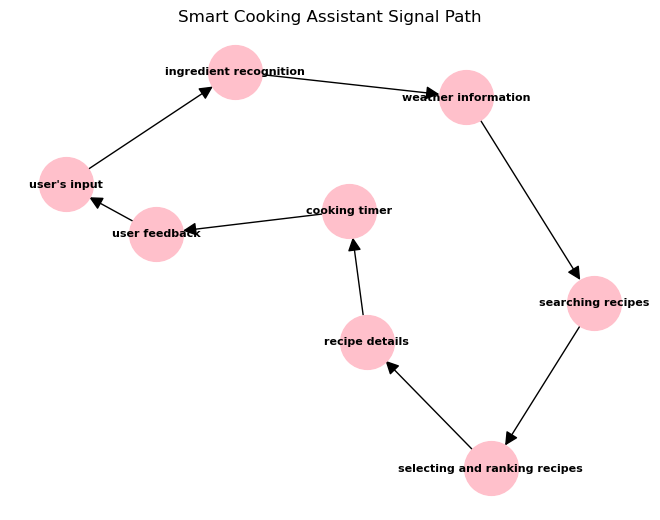

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

nodes = [
    "user's input",
    "ingredient recognition",
    "weather information",
    "searching recipes",
    "selecting and ranking recipes",
    "recipe details",
    "cooking timer",
    "user feedback"
]

edges = [
    ("user's input", "ingredient recognition"),
    ("ingredient recognition", "weather information"),
    ("weather information", "searching recipes"),
    ("searching recipes", "selecting and ranking recipes"),
    ("selecting and ranking recipes", "recipe details"),
    ("recipe details", "cooking timer"),
    ("cooking timer", "user feedback"),
    ("user feedback", "user's input")
]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='pink', font_size=8, font_color='black', font_weight='bold', arrowsize=20)

plt.title("Smart Cooking Assistant Signal Path", fontsize=12)

plt.show()

## Parameters of the topology

Degree of nodes indicates how many links to another one some node has. In this topology every node has degree 2.

Adjacent matrix presents the connections between the nodes.

Diameter represents the maximum number of edges that must be traversed to go from one node to another in the graph. In this case, diameter is 7.

Clustering coefficient of any node is 0, because one node's neighbours have have zero links between each other.

In [11]:
print(G.degree())

A=nx.adjacency_matrix(G)
print(A.todense())

print(nx.diameter(G))

print(nx.clustering(G))

[("user's input", 2), ('ingredient recognition', 2), ('weather information', 2), ('searching recipes', 2), ('selecting and ranking recipes', 2), ('recipe details', 2), ('cooking timer', 2), ('user feedback', 2)]
[[0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0]]
7
{"user's input": 0, 'ingredient recognition': 0, 'weather information': 0, 'searching recipes': 0, 'selecting and ranking recipes': 0, 'recipe details': 0, 'cooking timer': 0, 'user feedback': 0}


## Analysis of the topology as a communication network

Information flows in a clear and organized way. It starts with the user's input and goes through stages. This structured flow ensures that information reaches the right stages in the cooking process.
The loop involving user feedback and input makes the system more adaptable to individual preferences. It allows users to have a say in the cooking process, which can lead to a more personalized and user-friendly experience. 
While the system is robust in adapting to variations in user preferences, it is sensitive to failures at any stage. If any stage fails, the system stops working. But in this case, it may could be considered as a positive aspect. For example, if the device can't scan the ingredients, any recipe won't be proposed, which makes logical sense. We don't want to get a random recipe, but based on the ingredients.

## Global food waste


In [16]:
#! pip install numpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

df = pd.read_csv("df.csv")

df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [17]:
df.describe()

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),M49 code
count,214.000000,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000
mean,126.794393,84.294393,2.658896e+06,15.116822,5.520454e+05,27.383178,1.138859e+06,433.971963
std,22.157879,18.313705,8.596906e+06,5.767840,2.195578e+06,6.508420,5.380459e+06,252.185786
min,61.000000,33.000000,8.500000e+02,3.000000,1.380000e+02,3.000000,2.760000e+02,4.000000
25%,115.000000,74.000000,6.831550e+04,13.000000,1.250925e+04,26.000000,2.239125e+04,219.000000
50%,123.000000,80.000000,5.205080e+05,16.000000,1.006500e+05,28.000000,1.884660e+05,432.000000
75%,137.750000,95.000000,2.111314e+06,16.000000,3.568158e+05,28.000000,6.307618e+05,645.250000
max,260.000000,189.000000,9.164621e+07,79.000000,2.242470e+07,90.000000,6.537774e+07,894.000000


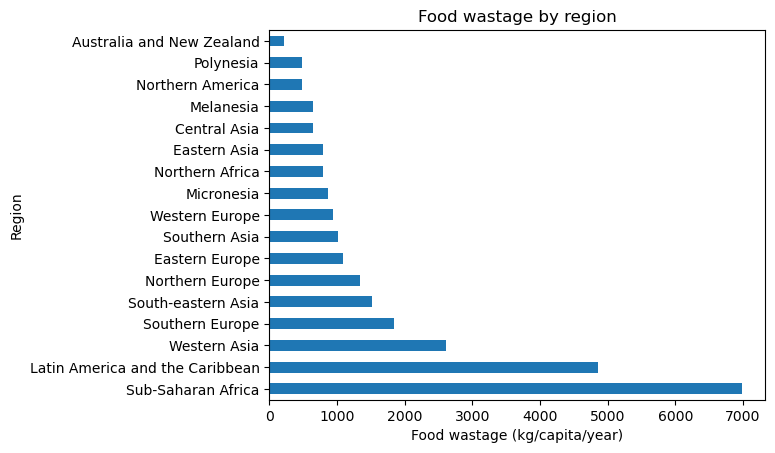

In [19]:
waste_by_region = df.groupby('Region')['combined figures (kg/capita/year)'].sum().sort_values(ascending=False)
waste_by_region.plot(kind='barh',title='Food wastage by region')
plt.xlabel('Food wastage (kg/capita/year)')
plt.show()

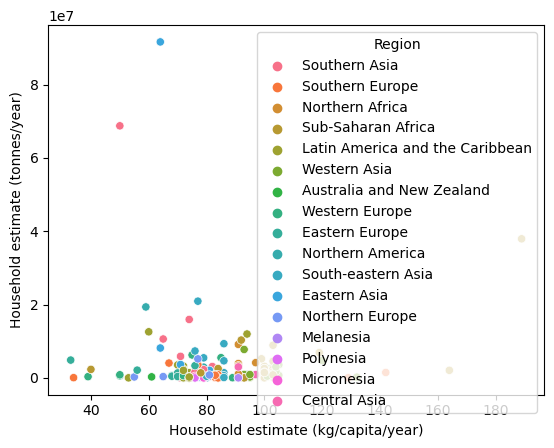

In [22]:
sns.scatterplot(x='Household estimate (kg/capita/year)',y='Household estimate (tonnes/year)',data=df, hue='Region')
plt.show()

<Axes: xlabel='Country', ylabel='Household estimate (kg/capita/year)'>

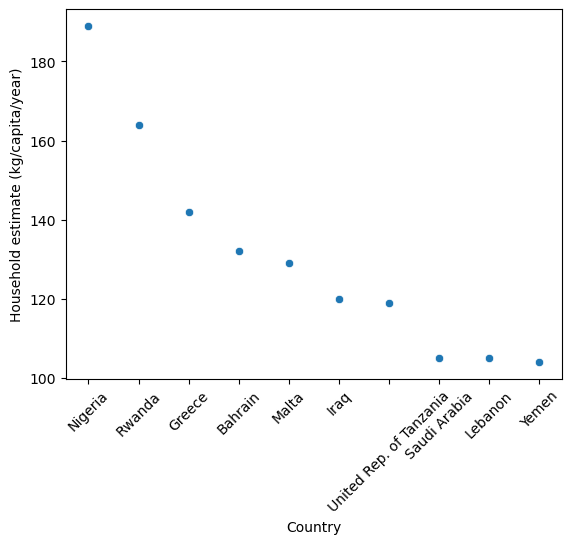

In [23]:
df_sorted = df.sort_values(by='Household estimate (kg/capita/year)', ascending=False)
top_10_countries = df_sorted.head(10)
plt.xticks(rotation=45) 
sns.scatterplot(x=top_10_countries['Country'], y=top_10_countries['Household estimate (kg/capita/year)'])

<Axes: xlabel='Country', ylabel='Household estimate (kg/capita/year)'>

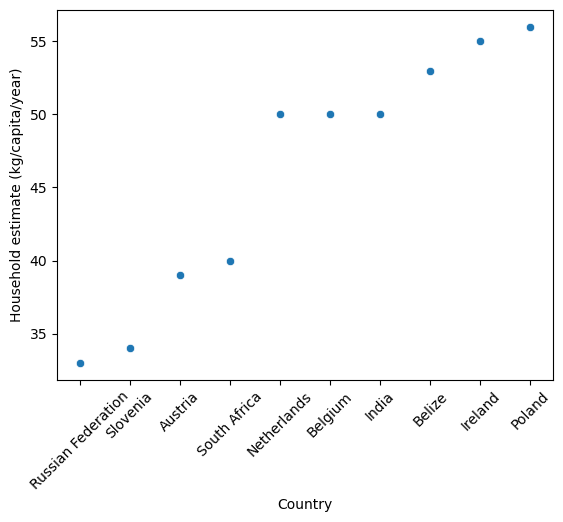

In [24]:
df_sorted = df.sort_values(by='Household estimate (kg/capita/year)', ascending=True)
top_10_countries = df_sorted.head(10)
plt.xticks(rotation=45) 
sns.scatterplot(x=top_10_countries['Country'], y=top_10_countries['Household estimate (kg/capita/year)'])